In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dushminmalisha","key":"f24811fdb72a69cc3d94147dd5ecb562"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imsparsh/musicnet-dataset

Dataset URL: https://www.kaggle.com/datasets/imsparsh/musicnet-dataset
License(s): CC0-1.0
100% 21.5G/21.5G [04:09<00:00, 165MB/s]
100% 21.5G/21.5G [04:09<00:00, 92.4MB/s]


In [ ]:
!unzip musicnet-dataset.zip

Archive:  musicnet-dataset.zip
  inflating: musicnet.npz            
  inflating: musicnet/musicnet/test_data/1759.wav  
  inflating: musicnet/musicnet/test_data/1819.wav  
  inflating: musicnet/musicnet/test_data/2106.wav  
  inflating: musicnet/musicnet/test_data/2191.wav  
  inflating: musicnet/musicnet/test_data/2298.wav  
  inflating: musicnet/musicnet/test_data/2303.wav  
  inflating: musicnet/musicnet/test_data/2382.wav  
  inflating: musicnet/musicnet/test_data/2416.wav  
  inflating: musicnet/musicnet/test_data/2556.wav  
  inflating: musicnet/musicnet/test_data/2628.wav  
  inflating: musicnet/musicnet/test_labels/1759.csv  
  inflating: musicnet/musicnet/test_labels/1819.csv  
  inflating: musicnet/musicnet/test_labels/2106.csv  
  inflating: musicnet/musicnet/test_labels/2191.csv  
  inflating: musicnet/musicnet/test_labels/2298.csv  
  inflating: musicnet/musicnet/test_labels/2303.csv  
  inflating: musicnet/musicnet/test_labels/2382.csv  
  inflating: musicnet/musicnet/te

In [ ]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [ ]:
!pip install --upgrade pyfluidsynth

  Preparing metadata (setup.py) ... done
  Created wheel for pyfluidsynth: filename=pyFluidSynth-1.3.3-py3-none-any.whl size=19185 sha256=01b17bc262a43e961e0494b0f9686c59502b8548edaaa5f16766d0f8393dbb08
  Stored in directory: /root/.cache/pip/wheels/e6/9c/2b/b4b194cbb100d6f20136a22b2f76cd329b1a21139ed26c9775
Successfully built pyfluidsynth


In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=a8ff3f458fec1000367e3776c605af1b69b6a6090f3dc13d78f7ac7da50e0036
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
import collections
import datetime
import fluidsynth
import glob
import pathlib
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [ ]:
filenames = glob.glob(str('musicnet_midis/musicnet_midis/**/*.mid*'))
print('Number of files:', len(filenames))

Number of files: 330


In [ ]:
sample_file = filenames[1]
print(sample_file)

musicnet_midis/musicnet_midis/Cambini/2075_quintBb1.mid


In [ ]:
pm = pretty_midi.PrettyMIDI(sample_file)

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [ ]:
display_audio(pm)

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 5
Instrument name: Flute


## Extract notes

In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=82, note_name=A#5, duration=0.8077
1: pitch=77, note_name=F5, duration=0.6058
2: pitch=86, note_name=D6, duration=0.1022
3: pitch=82, note_name=A#5, duration=0.2043
4: pitch=86, note_name=D6, duration=0.1154
5: pitch=89, note_name=F6, duration=0.1010
6: pitch=87, note_name=D#6, duration=0.1154
7: pitch=86, note_name=D6, duration=0.1154
8: pitch=84, note_name=C6, duration=0.1154
9: pitch=82, note_name=A#5, duration=0.1010


In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,82,0.000000,0.807691,0.000000,0.807691
1,77,0.923076,1.528845,0.923076,0.605769
2,86,1.615383,1.717546,0.692307,0.102163
3,82,1.846152,2.050479,0.230769,0.204327
4,86,2.538459,2.653843,0.692307,0.115385


In [ ]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['A#5', 'F5', 'D6', 'A#5', 'D6', 'F6', 'D#6', 'D6', 'C6', 'A#5'],
      dtype='<U3')

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

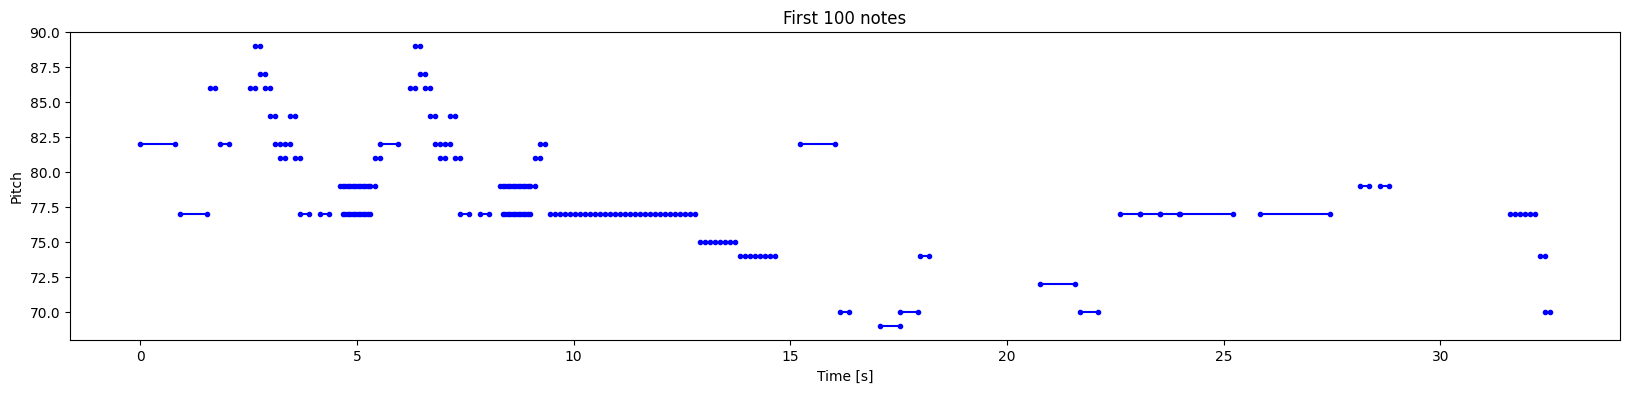

In [ ]:
plot_piano_roll(raw_notes, count=100)

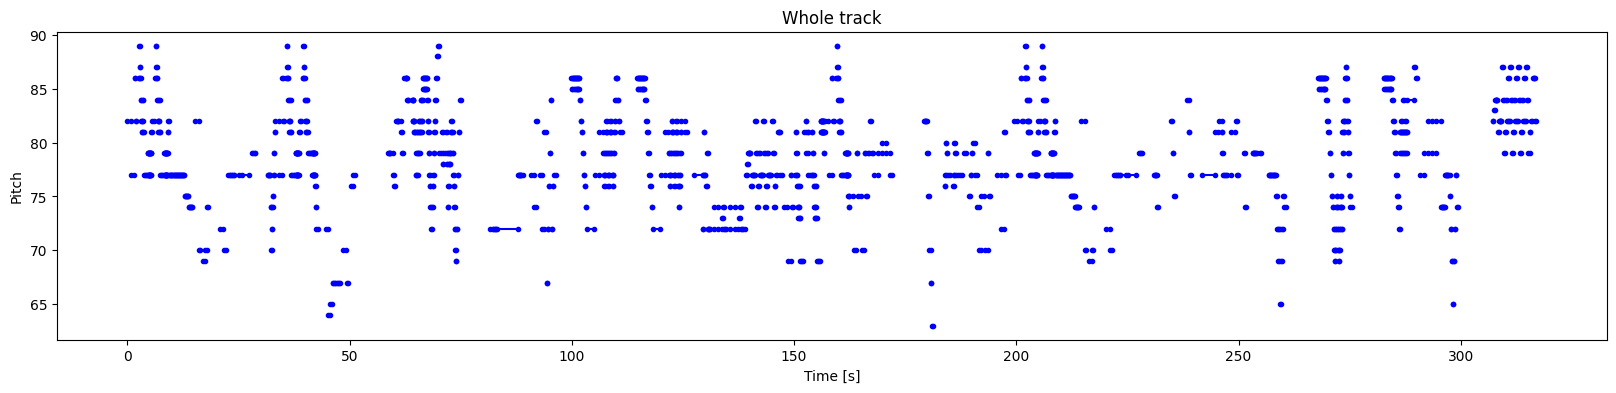

In [ ]:
plot_piano_roll(raw_notes)

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

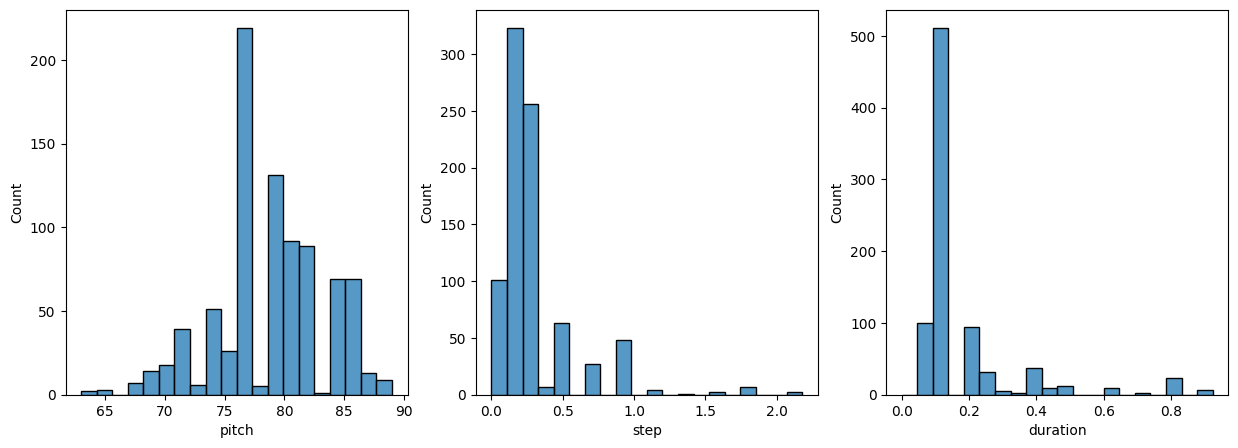

In [ ]:
plot_distributions(raw_notes)

## Create a MIDI file

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

In [ ]:
display_audio(example_pm)

## Create the training dataset

In [ ]:
num_files = 5
all_notes = []
for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

In [ ]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 2884


In [ ]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [ ]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [ ]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.5390625  0.         1.45833319]
 [0.5390625  1.6666665  0.54976846]
 [0.5390625  0.5555555  0.54976846]
 [0.5390625  0.5555555  0.52083328]
 [0.5390625  0.5555555  0.54976846]
 [0.5390625  0.5555555  0.54976846]
 [0.5390625  0.5555555  0.54976846]
 [0.5390625  0.5555555  0.54976846]
 [0.5390625  0.5555555  0.54976846]
 [0.5390625  0.5555555  0.52083328]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=70.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.5555554999999988>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.5208332812500025>}


In [ ]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

## Create and train the model

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [ ]:
!unzip pianomodel.zip

unzip:  cannot find or open pianomodel.zip, pianomodel.zip.zip or pianomodel.zip.ZIP.


In [ ]:
# with tf.keras.utils.custom_object_scope({'mse_with_positive_pressure': mse_with_positive_pressure}):
#   model = tf.keras.models.load_model("content/pianomodel")

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128, name='lstm_1', return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(128, name='lstm_2', return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, name='lstm_3')(x)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm_1 (LSTM)               (None, 25, 128)              67584     ['input_1[0][0]']             
                                                                                                  
 lstm_2 (LSTM)               (None, 25, 128)              131584    ['lstm_1[0][0]']              
                                                                                                  
 lstm_3 (LSTM)               (None, 128)                  131584    ['lstm_2[0][0]']              
                                                                                              

In [ ]:
losses = model.evaluate(train_ds, return_dict=True)
losses

44/44 [==============================] - 12s 125ms/step - loss: 6.0768 - duration_loss: 0.1685 - pitch_loss: 4.8561 - step_loss: 1.0522


{'loss': 6.076809883117676,
 'duration_loss': 0.16846205294132233,
 'pitch_loss': 4.856117248535156,
 'step_loss': 1.0522315502166748}

In [ ]:
# model.compile(
#     loss=loss,
#     loss_weights={
#         'pitch': 0.05,
#         'step': 1.0,
#         'duration':1.0,
#     },
#     optimizer=optimizer,
# )

In [ ]:
model.evaluate(train_ds, return_dict=True)

44/44 [==============================] - 2s 52ms/step - loss: 6.0768 - duration_loss: 0.1685 - pitch_loss: 4.8561 - step_loss: 1.0522


{'loss': 6.076809883117676,
 'duration_loss': 0.16846205294132233,
 'pitch_loss': 4.856117248535156,
 'step_loss': 1.0522315502166748}

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/kaggle/working/training_checkpoints/ckpt_{epoch}.weights.h5',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
44/44 [==============================] - 13s 163ms/step - loss: 4.5368 - duration_loss: 0.3859 - pitch_loss: 3.2092 - step_loss: 0.9417
Epoch 2/50
44/44 [==============================] - 5s 124ms/step - loss: 3.6256 - duration_loss: 0.1160 - pitch_loss: 2.6454 - step_loss: 0.8642
Epoch 3/50
44/44 [==============================] - 5s 123ms/step - loss: 3.5781 - duration_loss: 0.1050 - pitch_loss: 2.6365 - step_loss: 0.8365
Epoch 4/50
44/44 [==============================] - 7s 164ms/step - loss: 3.5464 - duration_loss: 0.1017 - pitch_loss: 2.6273 - step_loss: 0.8173
Epoch 5/50
44/44 [==============================] - 5s 124ms/step - loss: 3.5016 - duration_loss: 0.0987 - pitch_loss: 2.6199 - step_loss: 0.7829
Epoch 6/50
44/44 [==============================] - 7s 156ms/step - loss: 3.4489 - duration_loss: 0.0965 - pitch_loss: 2.6149 - step_loss: 0.7375
Epoch 7/50
44/44 [==============================] - 6s 125ms/step - loss: 3.4133 - duration_loss: 0.0959 - pitch_loss: 2.60

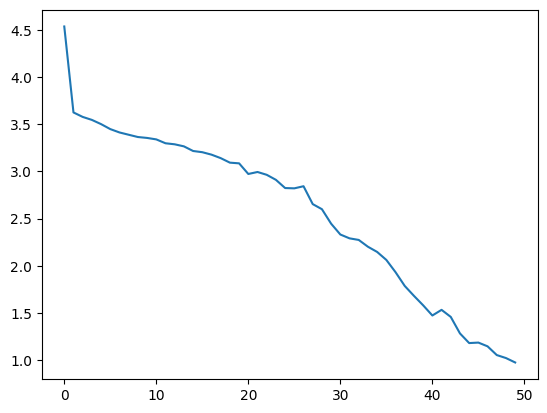

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

## Generate notes

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [ ]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - 0s 57ms/step


In [ ]:
generated_notes.head(10)

,pitch,step,duration,start,end
0,77,0.061427,0.055741,0.061427,0.117168
1,85,0.127478,0.000000,0.188905,0.188905
2,83,0.119517,0.000000,0.308422,0.308422
3,77,0.104211,0.004600,0.412634,0.417234
4,79,0.112841,0.021631,0.525475,0.547105
5,77,0.128110,0.024308,0.653585,0.677893
6,76,0.119308,0.044911,0.772893,0.817805
7,77,0.118572,0.051787,0.891465,0.943252
8,56,0.114268,0.044042,1.005733,1.049775
9,77,0.112488,0.031109,1.118221,1.149330


In [ ]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

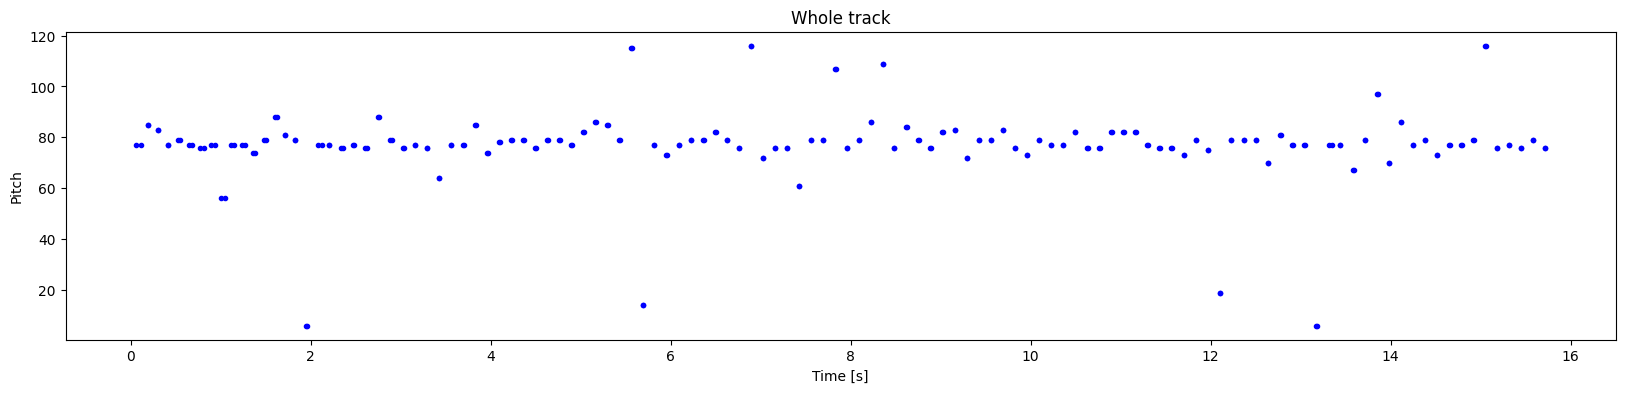

In [ ]:
plot_piano_roll(generated_notes)

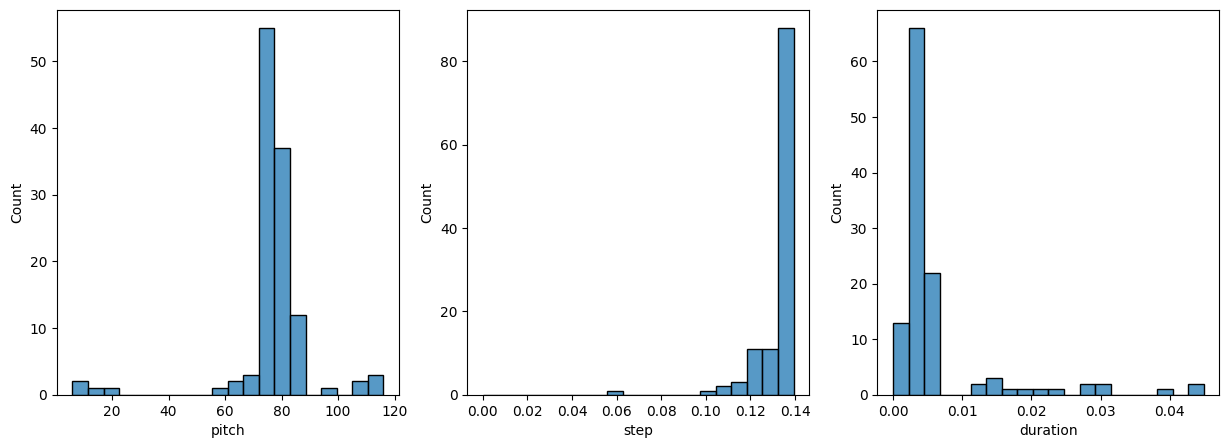

In [ ]:
plot_distributions(generated_notes)

In [ ]:
model.save("classicalmusicgeneratorthreelayer")

In [ ]:
!zip -r /content/classicalmusicgeneratorthreelayer.zip /content/classicalmusicgeneratorthreelayer

  adding: content/classicalmusicgeneratorthreelayer/ (stored 0%)
  adding: content/classicalmusicgeneratorthreelayer/keras_metadata.pb (deflated 92%)
  adding: content/classicalmusicgeneratorthreelayer/variables/ (stored 0%)
  adding: content/classicalmusicgeneratorthreelayer/variables/variables.index (deflated 68%)
  adding: content/classicalmusicgeneratorthreelayer/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/classicalmusicgeneratorthreelayer/fingerprint.pb (stored 0%)
  adding: content/classicalmusicgeneratorthreelayer/saved_model.pb (deflated 90%)
  adding: content/classicalmusicgeneratorthreelayer/assets/ (stored 0%)
